In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/home/diana/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

# Ensure matplotlib inline plotting
%matplotlib inline


In [5]:

# Step 2: Load Your Data
df = pd.read_csv('../data/raw/arxiv.csv')
df

,arxiv-id,Published,Title,Authors,Journal reference,Comments,Primary Category,All Categories,Abstract,Main Body,Word Count,PDF Link,Label
0,2306.12956v1,2023-06-22T15:15:44Z,Pauli blocking effects on pair creation in str...,Mikalai Prakapenia|Gregory Vereshchagin,Phys Rev D 108 013002 (2023),Accepted for publication in Physical Review D,physics.plasm-ph,physics.plasm-ph|astro-ph.CO|astro-ph.HE,The process of electron-positron pair creation...,Pauli blocking effects on pair creation in str...,4153,http://arxiv.org/pdf/2306.12956v1,0
1,2111.04524v1,2021-11-08T14:15:50Z,Beyond Participation: A Review of Co-Creation ...,Juliane Jarke|Gabriela Molina León|Irina Zakha...,No journal ref found,ZeMKI Working Paper No 39 ZeMKI - Centre for M...,cs.HC,cs.HC|cs.CY,New methods and technologies for engaging futu...,ZeMKI Working PaperNo 39\nISSN 23672277\nJulia...,10945,http://arxiv.org/pdf/2111.04524v1,0
2,1511.07709v2,2015-11-24T14:05:15Z,Multi-pair states in electron-positron pair cr...,Anton Wöllert|Heiko Bauke|Christoph H Keitel,Physics Letters B vol 760 pages 552-557 (2016),No comment found,quant-ph,quant-ph,Ultra strong electromagnetic fields can lead t...,Multipair states in electronpositron pair crea...,2312,http://arxiv.org/pdf/1511.07709v2,0
3,physics/0511116v1,2005-11-13T23:24:08Z,Universe creation on a computer,Gordon McCabe,StudHistPhilosModPhys36:591-6252005,No comment found,physics.gen-ph,physics.gen-ph,The purpose of this paper is to provide an acc...,5002\nvoN\n31\nhpnegscisyhp\n1v6111150scisyhpv...,14478,http://arxiv.org/pdf/physics/0511116v1,0
4,2304.10462v3,2023-04-20T17:08:04Z,Creation and annihilation operators for 2D non...,Nicetu Tibau Vidal|Lucia Vilchez-Estevez,No journal ref found,9+5 pages 18 figures,quant-ph,quant-ph|cond-mat.str-el,We define creation and annihilation operators ...,Creation and annihilation operators for 2D non...,8409,http://arxiv.org/pdf/2304.10462v3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,hep-ph/0006086v2,2000-06-09T16:36:45Z,Superheavy Particles in Friedmann Cosmology an...,A A Grib|Yu V Pavlov,IntJModPhys D11 (2002) 433-436,No comment found,hep-ph,hep-ph,The model of creation of observable particles ...,1002\nnuJ\n6\n2v6806000hppehviXra\n1\nSUPERHEA...,1172,http://arxiv.org/pdf/hep-ph/0006086v2,0
389,hep-ph/0103148v1,2001-03-14T06:35:14Z,Massive fermion production in nonsingular supe...,Shinji Tsujikawa|Hiroki Yajima,PhysRev D64 (2001) 023519,5 pages 3 figures,hep-ph,hep-ph|astro-ph|gr-qc|hep-th,We study massive spin-1/2 fermion production i...,1002\nraM\n41\n1v8413010hppehviXra\nMassive fe...,3015,http://arxiv.org/pdf/hep-ph/0103148v1,0
390,hep-ph/0110321v1,2001-10-25T19:06:39Z,Collective Deceleration of Ultrarelativistic N...,I N Mishustin|J I Kapusta,PhysRevLett 88 (2002) 112501,11 pages in revtex 2 eps figures,hep-ph,hep-ph,We propose a unified space-time picture of bar...,1002\ntcO\n52\n1v1230110hppehviXra\nNUCMINN140...,3925,http://arxiv.org/pdf/hep-ph/0110321v1,0
391,hep-ph/0304138v1,2003-04-15T08:26:47Z,On coherent radiation in electron-positron col...,V N Baier|V M Katkov,No journal ref found,Plenary talk at Quantum Aspects of Beam Physic...,hep-ph,hep-ph,The electromagnetic processes in linear collid...,3002\nrpA\n51\n1v8314030hppehviXra\nJuly132018...,2525,http://arxiv.org/pdf/hep-ph/0304138v1,0


In [7]:

# Step 3: Basic Data Overview
print("Data Shape:", df.shape)
print("Data Info:")
print(df.info())




Data Shape: (393, 13)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   arxiv-id           393 non-null    object
 1   Published          393 non-null    object
 2   Title              393 non-null    object
 3   Authors            393 non-null    object
 4   Journal reference  393 non-null    object
 5   Comments           393 non-null    object
 6   Primary Category   393 non-null    object
 7   All Categories     393 non-null    object
 8   Abstract           393 non-null    object
 9   Main Body          393 non-null    object
 10  Word Count         393 non-null    int64 
 11  PDF Link           393 non-null    object
 12  Label              393 non-null    int64 
dtypes: int64(2), object(11)
memory usage: 40.0+ KB
None


In [8]:

# Handle missing values, if necessary. For example, filling missing values with the mean or mode:
# df['Column'].fillna(df['Column'].mean(), inplace=True)

# Step 5: Descriptive Statistics
print("Descriptive statistics of the dataset:")
print(df.describe())


Descriptive statistics of the dataset:
        Word Count  Label
count    393.00000  393.0
mean    5551.10687    0.0
std     4981.65228    0.0
min        0.00000    0.0
25%     2833.00000    0.0
50%     4390.00000    0.0
75%     6931.00000    0.0
max    63785.00000    0.0


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Set up stop words (including some pronouns and articles as specified)
stop_words = set(stopwords.words('english')) | {'he', 'she', 'it', 'they', 'his', 'her', 'its', 'their', 'the', 'a', 'an'}


[nltk_data] Downloading package punkt to /home/diana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/diana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:

def get_most_frequent_word(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize and filter out stop words and words less than or equal to three letters
    words = [word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and len(word) > 3 and word.isalpha()]
    # Get the most common word
    if words:
        most_common_word = Counter(words).most_common(1)[0][0]
        return most_common_word
    return None

In [27]:

df['Most Frequent Word'] = df['Main Body'].dropna().apply(get_most_frequent_word)
df

,arxiv-id,Published,Title,Authors,Journal reference,Comments,Primary Category,All Categories,Abstract,Main Body,Word Count,PDF Link,Label,Most Frequent Word
0,2306.12956v1,2023-06-22T15:15:44Z,Pauli blocking effects on pair creation in str...,Mikalai Prakapenia|Gregory Vereshchagin,Phys Rev D 108 013002 (2023),Accepted for publication in Physical Review D,physics.plasm-ph,physics.plasm-ph|astro-ph.CO|astro-ph.HE,The process of electron-positron pair creation...,Pauli blocking effects on pair creation in str...,4153,http://arxiv.org/pdf/2306.12956v1,0,field
1,2111.04524v1,2021-11-08T14:15:50Z,Beyond Participation: A Review of Co-Creation ...,Juliane Jarke|Gabriela Molina León|Irina Zakha...,No journal ref found,ZeMKI Working Paper No 39 ZeMKI - Centre for M...,cs.HC,cs.HC|cs.CY,New methods and technologies for engaging futu...,ZeMKI Working PaperNo 39\nISSN 23672277\nJulia...,10945,http://arxiv.org/pdf/2111.04524v1,0,cocreation
2,1511.07709v2,2015-11-24T14:05:15Z,Multi-pair states in electron-positron pair cr...,Anton Wöllert|Heiko Bauke|Christoph H Keitel,Physics Letters B vol 760 pages 552-557 (2016),No comment found,quant-ph,quant-ph,Ultra strong electromagnetic fields can lead t...,Multipair states in electronpositron pair crea...,2312,http://arxiv.org/pdf/1511.07709v2,0,pair
3,physics/0511116v1,2005-11-13T23:24:08Z,Universe creation on a computer,Gordon McCabe,StudHistPhilosModPhys36:591-6252005,No comment found,physics.gen-ph,physics.gen-ph,The purpose of this paper is to provide an acc...,5002\nvoN\n31\nhpnegscisyhp\n1v6111150scisyhpv...,14478,http://arxiv.org/pdf/physics/0511116v1,0,computer
4,2304.10462v3,2023-04-20T17:08:04Z,Creation and annihilation operators for 2D non...,Nicetu Tibau Vidal|Lucia Vilchez-Estevez,No journal ref found,9+5 pages 18 figures,quant-ph,quant-ph|cond-mat.str-el,We define creation and annihilation operators ...,Creation and annihilation operators for 2D non...,8409,http://arxiv.org/pdf/2304.10462v3,0,annihilation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,hep-ph/0006086v2,2000-06-09T16:36:45Z,Superheavy Particles in Friedmann Cosmology an...,A A Grib|Yu V Pavlov,IntJModPhys D11 (2002) 433-436,No comment found,hep-ph,hep-ph,The model of creation of observable particles ...,1002\nnuJ\n6\n2v6806000hppehviXra\n1\nSUPERHEA...,1172,http://arxiv.org/pdf/hep-ph/0006086v2,0,particles
389,hep-ph/0103148v1,2001-03-14T06:35:14Z,Massive fermion production in nonsingular supe...,Shinji Tsujikawa|Hiroki Yajima,PhysRev D64 (2001) 023519,5 pages 3 figures,hep-ph,hep-ph|astro-ph|gr-qc|hep-th,We study massive spin-1/2 fermion production i...,1002\nraM\n41\n1v8413010hppehviXra\nMassive fe...,3015,http://arxiv.org/pdf/hep-ph/0103148v1,0,fermions
390,hep-ph/0110321v1,2001-10-25T19:06:39Z,Collective Deceleration of Ultrarelativistic N...,I N Mishustin|J I Kapusta,PhysRevLett 88 (2002) 112501,11 pages in revtex 2 eps figures,hep-ph,hep-ph,We propose a unified space-time picture of bar...,1002\ntcO\n52\n1v1230110hppehviXra\nNUCMINN140...,3925,http://arxiv.org/pdf/hep-ph/0110321v1,0,energy
391,hep-ph/0304138v1,2003-04-15T08:26:47Z,On coherent radiation in electron-positron col...,V N Baier|V M Katkov,No journal ref found,Plenary talk at Quantum Aspects of Beam Physic...,hep-ph,hep-ph,The electromagnetic processes in linear collid...,3002\nrpA\n51\n1v8314030hppehviXra\nJuly132018...,2525,http://arxiv.org/pdf/hep-ph/0304138v1,0,photon


In [30]:
import pandas as pd
import re

# Assuming df_clean is your DataFrame and 'Main Body' is the column with text
def clean_text(text):
    # Remove LaTeX-like formulas that might be embedded in the text
    text = re.sub(r'\S+\d+\S+', '', text)
    
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

df['Main Body'] = df['Main Body'].apply(clean_text)

print(df['Main Body'].head())

0    Pauli blocking effects on pair creation in str...
1    ZeMKI Working PaperNo 39 ISSN Juliane Jarke Ga...
2    Multipair states in electronpositron pair crea...
3    voN 31 hpnegscisyhp Universe creation on a com...
4    Creation and annihilation operators for 2D non...
Name: Main Body, dtype: object


In [31]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

font_path = 'OpenSans-Regular.ttf' 
if os.path.exists(font_path):
    print("Font file exists.")
else:
    print("Font file does not exist. Check the path.")

try:
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(all_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Most Frequent Words')
    plt.show()
except ValueError as e:
    print(f"Error generating word cloud: {e}")




Font file exists.
Error generating word cloud: Only supported for TrueType fonts


In [10]:
%pip install WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 6.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


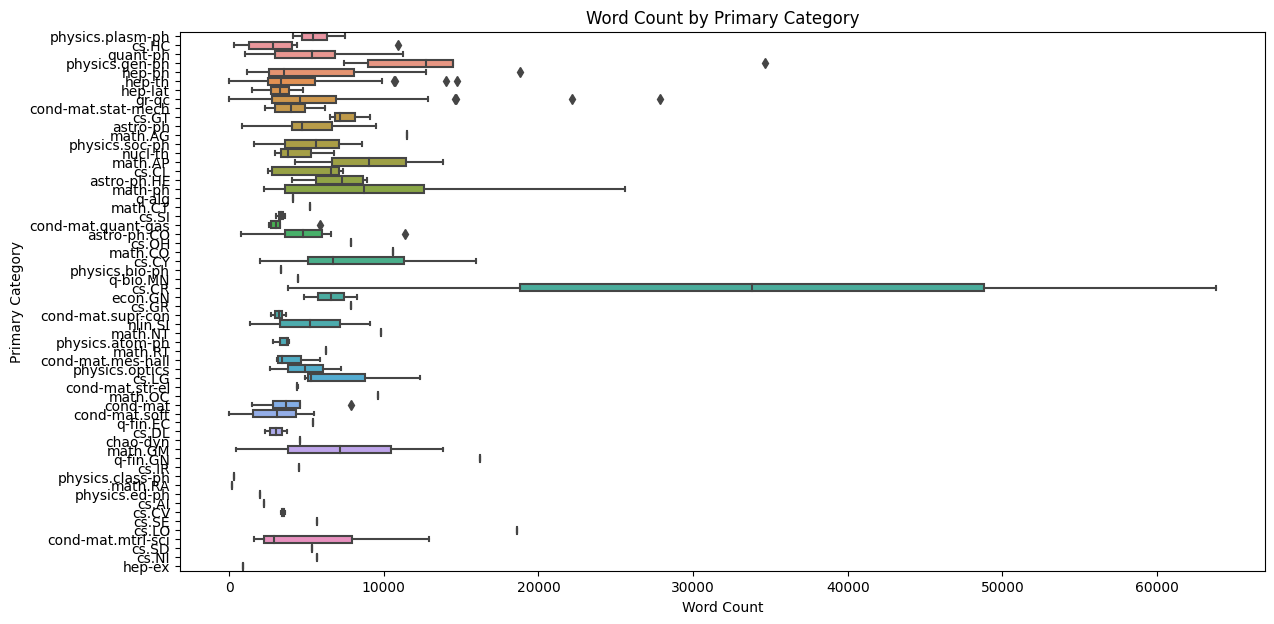

In [33]:

# Boxplot for Categories and Word Count to see if some categories have significantly different word counts
plt.figure(figsize=(14, 7))
sns.boxplot(x='Word Count', y='Primary Category', data=df)
plt.title('Word Count by Primary Category')
plt.xlabel('Word Count')
plt.ylabel('Primary Category')
plt.show()


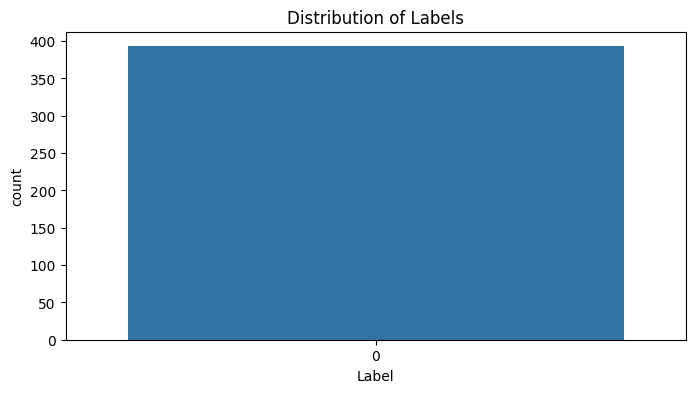

In [34]:

# Step 6: Data Visualization
# Distribution of the label
plt.figure(figsize=(8, 4))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.show()


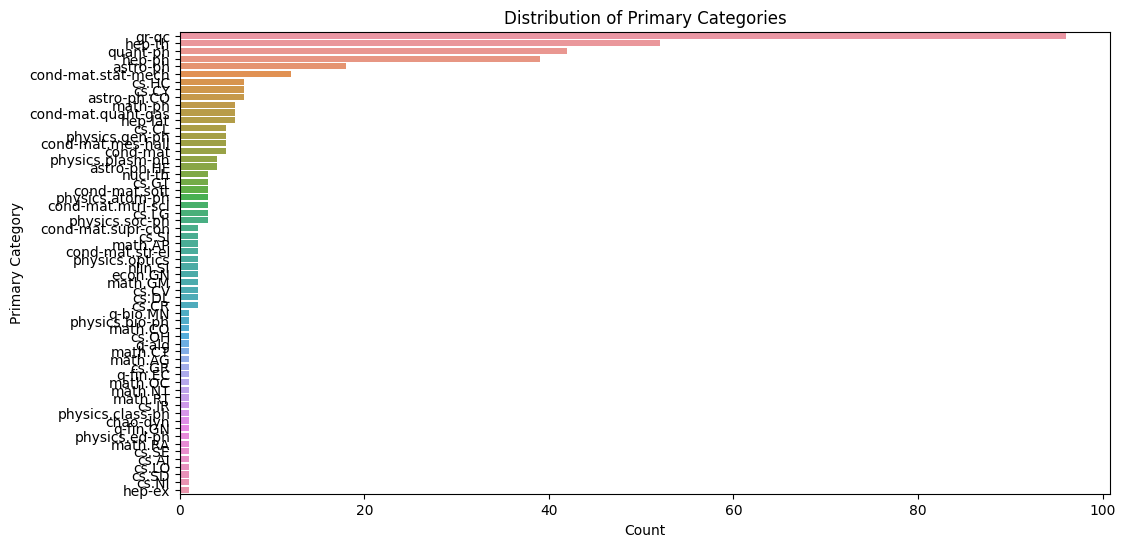

In [35]:

# Categories Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Primary Category', data=df, order=df['Primary Category'].value_counts().index)
plt.title('Distribution of Primary Categories')
plt.xlabel('Count')
plt.ylabel('Primary Category')
plt.show()


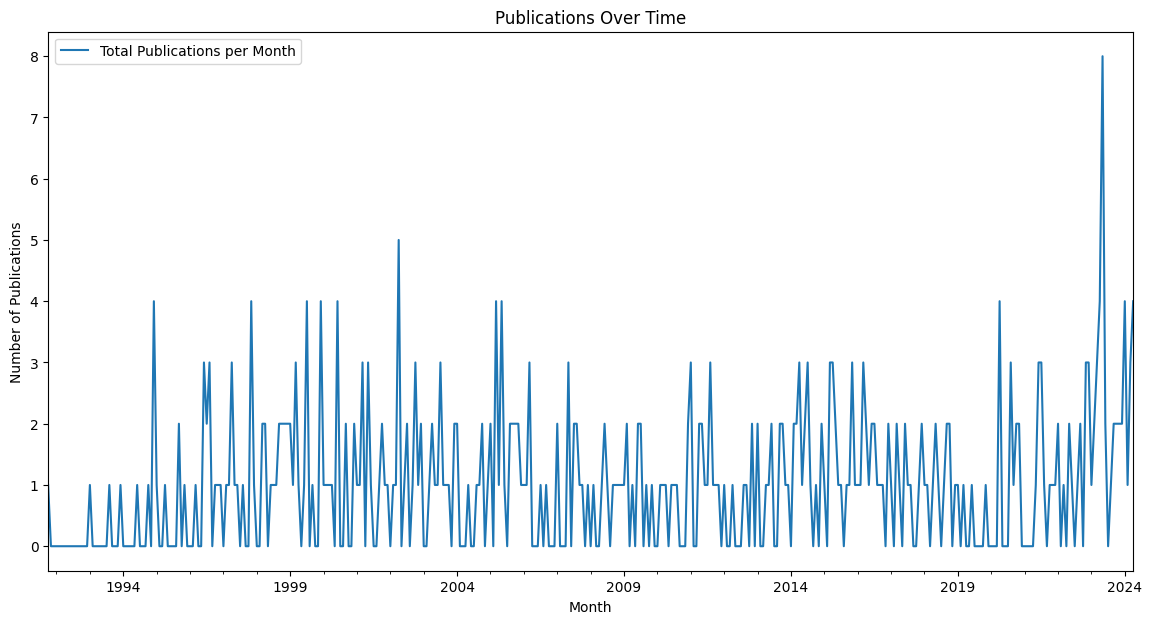

In [37]:

df['Published'] = pd.to_datetime(df['Published'])

plt.figure(figsize=(14, 7))
df.resample('M', on='Published').size().plot(label='Total Publications per Month')
plt.title('Publications Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Publications')
plt.legend()
plt.show()


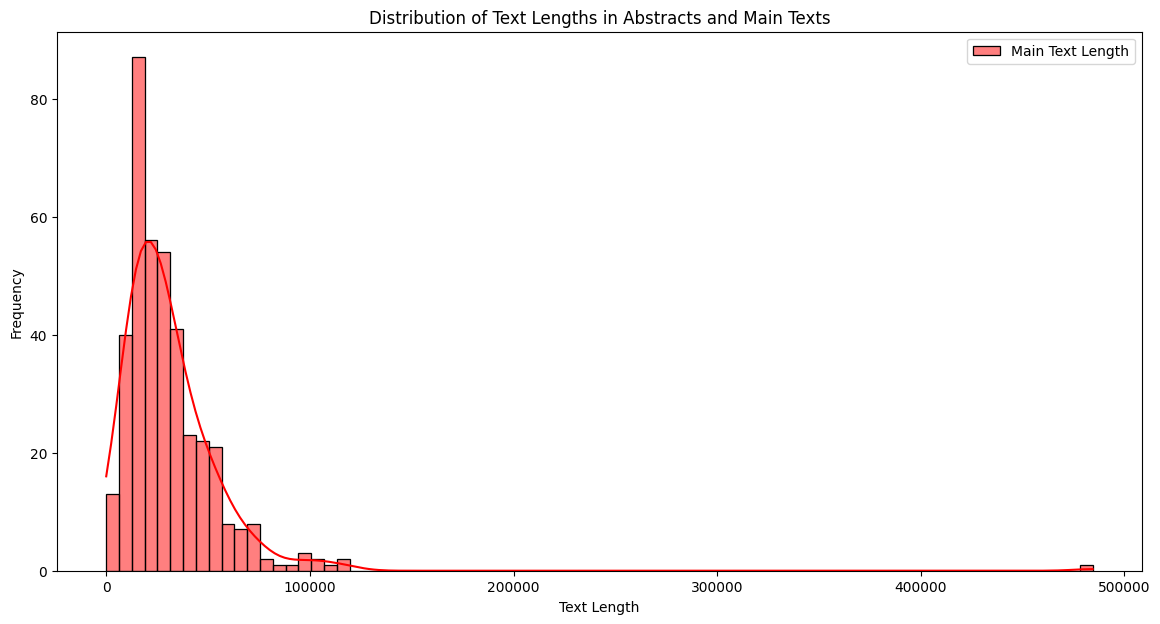

In [41]:

plt.figure(figsize=(14, 7))

sns.histplot(df['Main Body'].str.len(), color='red', label='Main Text Length', kde=True)
plt.title('Distribution of Text Lengths in Abstracts and Main Texts')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


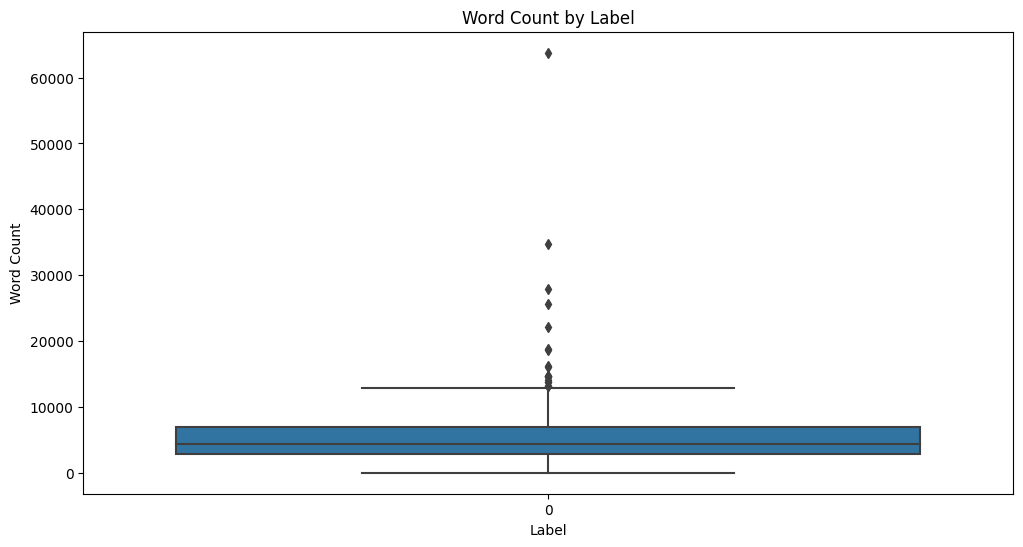

In [42]:

# Boxplot for Word Count by Label
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Word Count', data=df)
plt.title('Word Count by Label')
plt.show()


In [45]:

def get_most_frequent_word_count(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize and filter out stop words and words less than or equal to three letters
    words = [word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and len(word) > 3 and word.isalpha()]
    # Get the most common word count
    if words:
        most_common_word_count = Counter(words).most_common(1)[0][1]
        return most_common_word_count
    return 0

# Assuming df is your DataFrame and 'Main Body' is the column with text
df['Most Frequent Word Counts'] = df['Main Body'].apply(get_most_frequent_word_count)

# Show the updated DataFrame
print(df)

              arxiv-id                 Published  \
0         2306.12956v1 2023-06-22 15:15:44+00:00   
1         2111.04524v1 2021-11-08 14:15:50+00:00   
2         1511.07709v2 2015-11-24 14:05:15+00:00   
3    physics/0511116v1 2005-11-13 23:24:08+00:00   
4         2304.10462v3 2023-04-20 17:08:04+00:00   
..                 ...                       ...   
388   hep-ph/0006086v2 2000-06-09 16:36:45+00:00   
389   hep-ph/0103148v1 2001-03-14 06:35:14+00:00   
390   hep-ph/0110321v1 2001-10-25 19:06:39+00:00   
391   hep-ph/0304138v1 2003-04-15 08:26:47+00:00   
392   hep-th/9406044v1 1994-06-08 14:45:51+00:00   

                                                 Title  \
0    Pauli blocking effects on pair creation in str...   
1    Beyond Participation: A Review of Co-Creation ...   
2    Multi-pair states in electron-positron pair cr...   
3                      Universe creation on a computer   
4    Creation and annihilation operators for 2D non...   
..                         

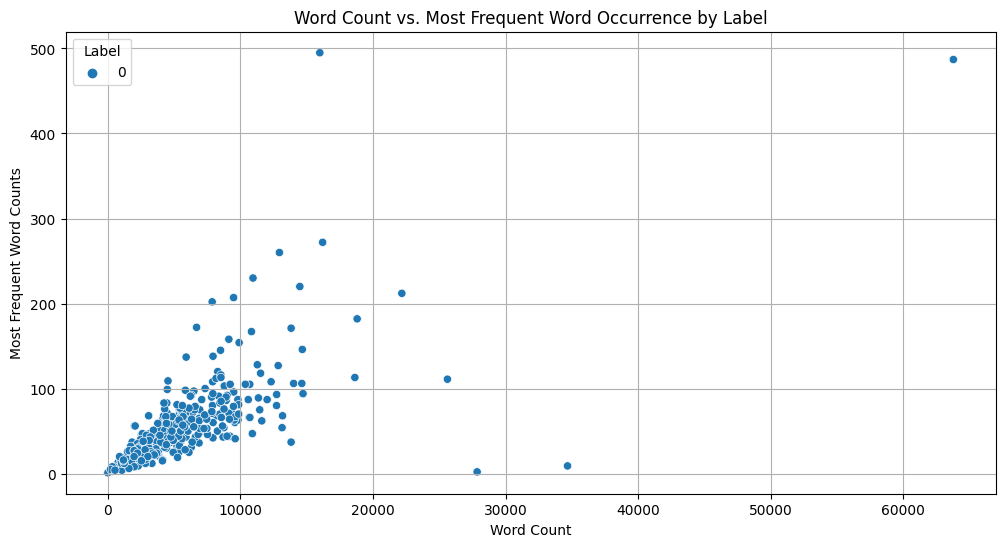

In [46]:

import seaborn as sns
from nltk.tokenize import word_tokenize

if 'Word Count' not in df.columns:
    df['Word Count'] = df['Main Body'].apply(lambda text: len(word_tokenize(text)))

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Word Count', y='Most Frequent Word Counts', hue='Label', data=df)
plt.title('Word Count vs. Most Frequent Word Occurrence by Label')
plt.xlabel('Word Count')
plt.ylabel('Most Frequent Word Counts')
plt.legend(title='Label')
plt.grid(True)
plt.show()


Correlation matrix:


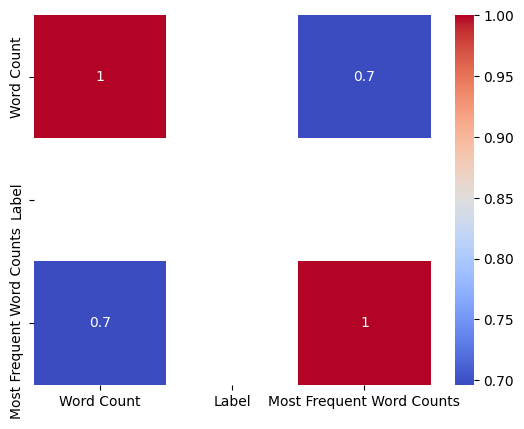

In [47]:

print("Correlation matrix:")
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [48]:

df['Abstract Length'] = df['Abstract'].apply(len)


In [49]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Primary Category'] = le.fit_transform(df['Primary Category'])
df['All Categories'] = le.fit_transform(df['All Categories'])


In [ ]:

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop('Label', axis=1)  # Drop the label to create features dataset
y = df['Label']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Final note: Output datasets ready for use in model training
print("Data preparation complete. Training and testing datasets ready for modeling.")